In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import seaborn as sns

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, set_link_color_palette
from scipy.cluster.hierarchy import dendrogram

import matplotlib
from matplotlib import pyplot as plt

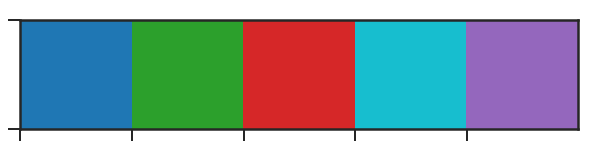

In [139]:
colors = sns.color_palette().as_hex()
colors = ['#1f77b4',  '#2ca02c', '#d62728', '#17becf', '#9467bd']
sns.palplot(colors)

In [140]:
def draw_graph(emb, atp, save = False, name = None):
    sns.set_style('ticks')
    sns.set_context('notebook', font_scale=1.1)
    
    Z = linkage(emb, method='complete', metric='cosine', optimal_ordering=False)

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor('white')
    label = atp
    set_link_color_palette(colors[1:])
    dn = dendrogram(Z, labels = label,  leaf_font_size = 16, color_threshold = 0.9, above_threshold_color=colors[0])
    plt.yticks([i*0.25 for i in range(9)],fontsize = 16)
    plt.xticks(fontsize=16)
    plt.ylim(0,2)
    plt.tight_layout()
    if save:
        plt.savefig(name, dpi = 300)
    
    return None

### CCc1ccc(O)cc1

In [141]:
### gaff type
amber_type =["c3","c3","ca","ca","ca","ca","oh","ca","ca","hc","hc","hc","hc","hc","ha","ha","ho","ha","ha"]
amber_tp_num = [tp +'\n' + str(idx+1) for idx, tp in enumerate(amber_type)]

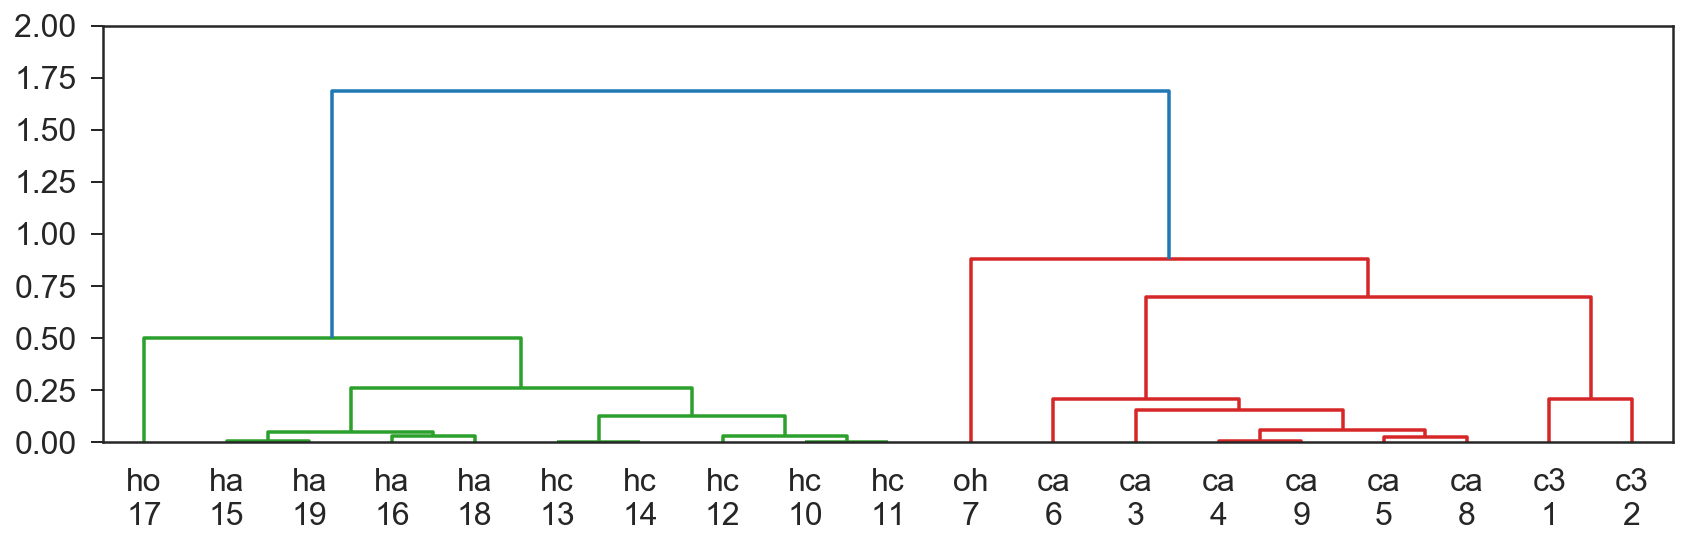

In [142]:
### our model
molecule_1_emb_new = np.load("molecule1_our.npz")
emb_new = molecule_1_emb_new["emb"]
draw_graph(emb_new, amber_tp_num, save=True, name='F2A.pdf')

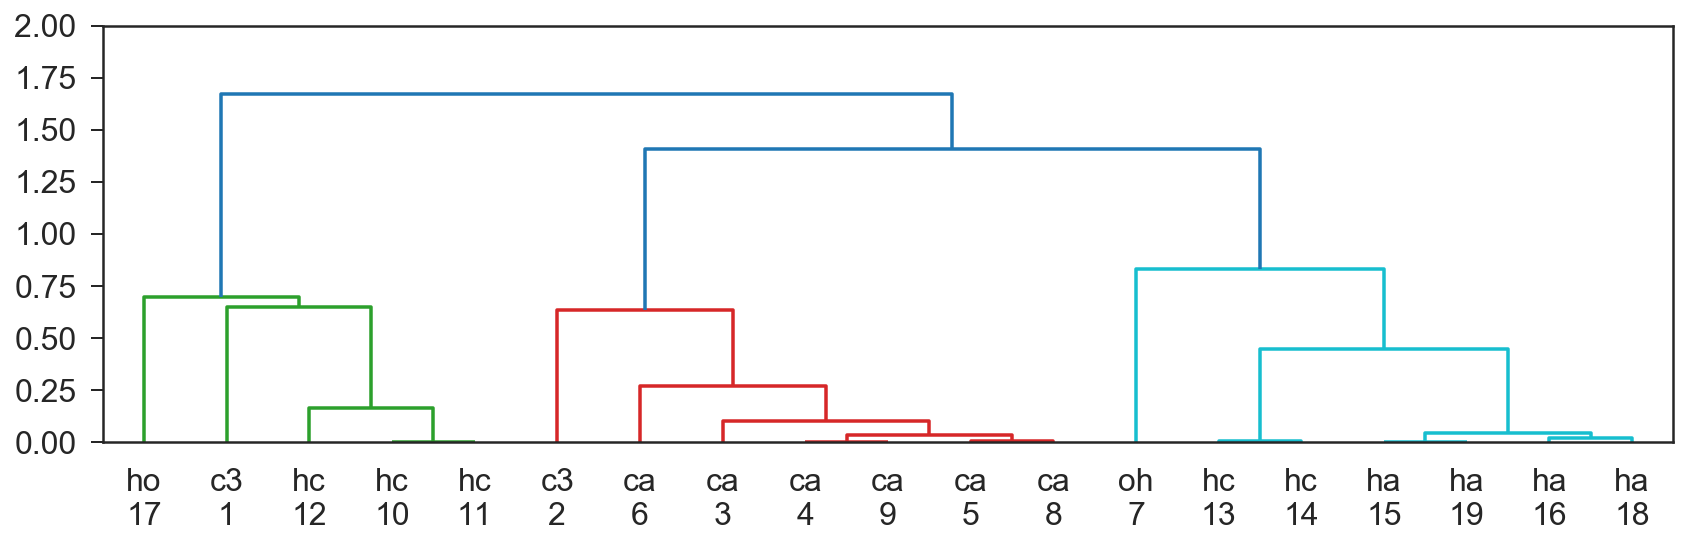

In [143]:
### DTNN model
molecule_1_emb_old = np.load("molecule1_DTNN.npz")
emb_old = molecule_1_emb_old["emb"]
draw_graph(emb_old,amber_tp_num, save=True, name='FS5A.pdf')

### OCc1cnc[nH]1

In [144]:
### gaff type 
amber_type = ["oh","c3","cc","cc","nc","cd","na","ho","h1","h1","h4","h5","hn"]
amber_tp_num = [tp +'\n' + str(idx+1) for idx, tp in enumerate(amber_type)]

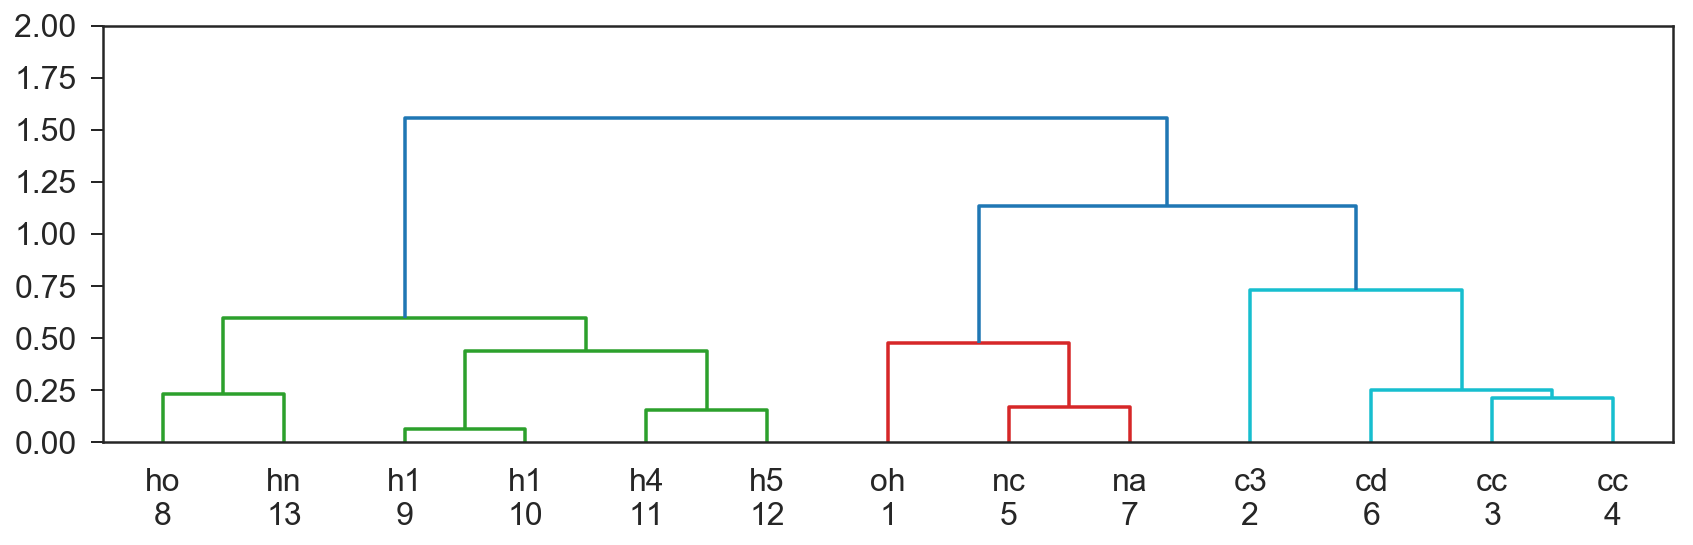

In [145]:
### our model
molecule_2_emb_new = np.load("molecule2_our.npz")
emb_new = molecule_2_emb_new["emb"]
draw_graph(emb_new,amber_tp_num, save=True, name='F2B.pdf')

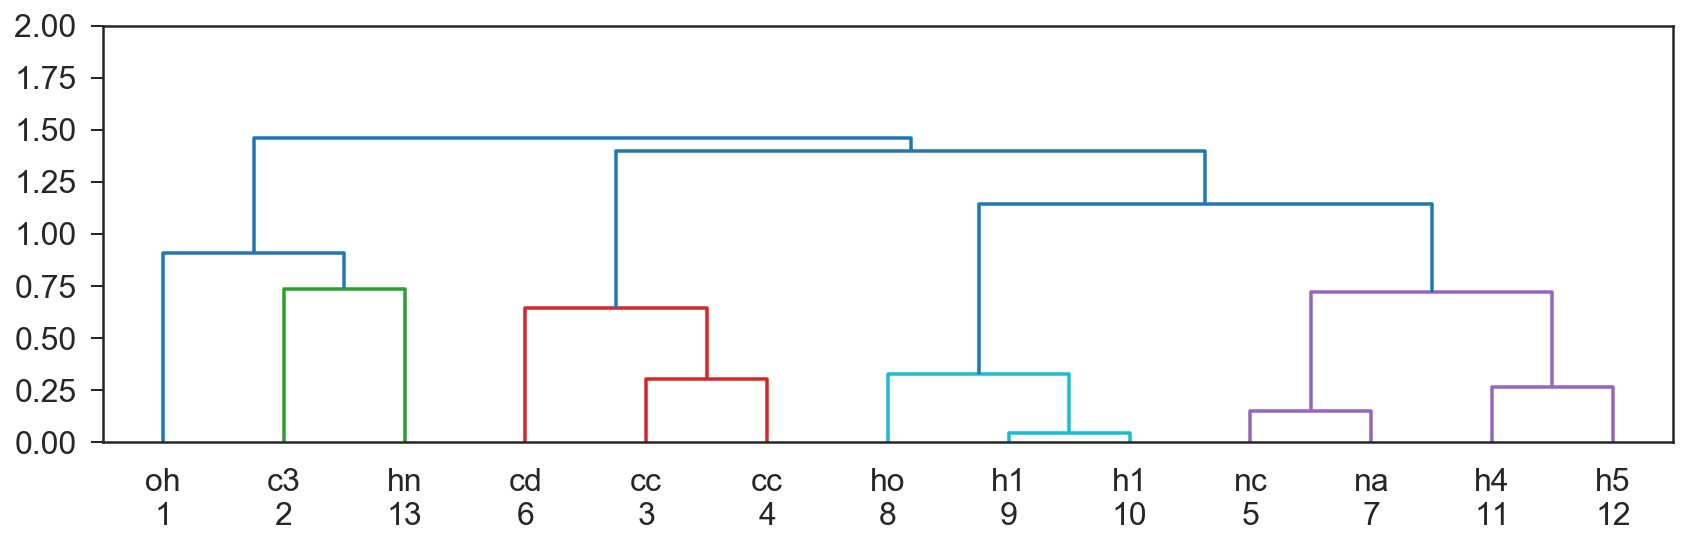

In [146]:
### our model
molecule_2_emb_old = np.load("molecule2_DTNN.npz")
emb_old = molecule_2_emb_old["emb"]
draw_graph(emb_old,amber_tp_num, save=True, name='FS5B.pdf')